## Prediction of pollution in the center of Barcelona (Eixample) using Machine Learning
***
This repository belongs to the final project of the Data Science course at IT Academy (Barcelona Activa). The main objective of the project is to predict the future pollution in the city center of Barcelona if no environmental measures or policies are implemented. To achieve this, knowledge in data analysis and data science acquired during the course has been applied.

### Data cleaning

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('cont_bcn_eixample_18_23.csv')

df

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,8,NO2,µg/m3,traffic,urban,8019,Barcelona,...,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538,NaN
1,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,9,PM2.5,µg/m3,traffic,urban,8019,Barcelona,...,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538,NaN
2,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,10,PM10,µg/m3,traffic,urban,8019,Barcelona,...,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538,NaN
3,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538,NaN
4,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538,POINT (2.1538 41.385315)
15451,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,12,NOX,µg/m3,traffic,urban,8019,Barcelona,...,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538,POINT (2.1538 41.385315)
15452,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538,POINT (2.1538 41.385315)
15453,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,7,NO,µg/m3,traffic,urban,8019,Barcelona,...,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538,POINT (2.1538 41.385315)


The project is based on a dataset obtained from the Generalitat de Catalunya, specifically from the Dades Obertes (Open Data) department. This dataset covers records of various air pollutants in the city of Barcelona, specifically from the monitoring station in l'Eixample, during the period between 2018 and 2023. The data was extracted from the website: https://analisi.transparenciacatalunya.cat/en/Medi-Ambient/Qualitat-de-l-aire-als-punts-de-mesurament-manuals/qg74-87s9/about_data

This source provides daily information on pollutants through manual sensors, updated quarterly. These sensors are part of the Air Pollution Surveillance and Forecasting Network since 2010, distributed in various locations in Catalunya. In this project, a sensor located in the center of Barcelona, specifically in l'Eixample, was selected. 

The CSV file downloaded from this website constitutes the database that will be used for the final Data Science project and contains the following variables: 

- **codi_eoi**: Official code assigned by the Ministry responsible for air quality, formed by province code, municipality code, and station code.
- **nom_estacio**: Name of the monitoring station.
- **data**: Year, month, and day of the measurement.
- **magnitud**: Numeric code identifying the pollutant.
- **contaminant**: Formula or mnemonic for the pollutant.
- **unitats**: Measurement units of the pollutant.
- **tipus_estacio**: Traffic: The measurement point is located in a place directly impacted by traffic emissions.
- **area_urbana**: Urban: The measurement point is located in an urban area characterized by continuous construction and the existence of urban infrastructure, including public services.
- **codi_ine**: 5-digit numeric code corresponding to the municipality (the first two digits correspond to the province, and the next three identify the municipality).
- **municipi**: Name of the municipality where the monitoring station is located.
- **codi_comarca**: Numeric code corresponding to the region.
- **nom_comarca**: Name of the region where the municipality is located.
- **h01 - h24**: Columns with the measured value for the station's pollutant (each pollutant has its units of measurement). Records are taken every hour of the day (24h).
- **altitud**: Numeric value of the altitude of the station. Unit: meters above sea level.
- **latitud**: Latitude expressed in decimal degrees. WGS84 reference system.
- **longitud**: Longitude expressed in decimal degrees. WGS84 reference system.
- **geocoded_column**: Georeferencing point (assignment of geographic coordinates - latitude and longitude - to the point where the monitoring station is located).

The next step involves cleaning the dataset: visualizing null values, duplicates, column removal, etc.

In [52]:
df.isnull().sum()

codi_eoi              0
nom_estacio           0
data                  0
magnitud              0
contaminant           0
unitats               0
tipus_estacio         0
area_urbana           0
codi_ine              0
municipi              0
codi_comarca          0
nom_comarca           0
h01                 411
h02                 737
h03                 460
h04                 418
h05                 419
h06                 426
h07                 430
h08                 433
h09                 460
h10                 562
h11                 873
h12                 980
h13                 979
h14                 903
h15                 777
h16                 691
h17                 469
h18                 412
h19                 384
h20                 381
h21                 387
h22                 394
h23                 392
h24                 395
altitud               0
latitud               0
longitud              0
geocoded_column    2180
dtype: int64

I'm going to create a dataset with null values for pollutants and hours to visualize if there is any pattern or pollutant that doesn't have records.

In [53]:
# Número de nulos totales por contaminante y columna

df_null = df.groupby('contaminant')[['h01', 'h02','h03', 'h04','h05', 'h06',
                                     'h07', 'h08','h09', 'h10','h11', 'h12',
                                     'h13', 'h14','h15', 'h16','h17', 'h18',
                                     'h19', 'h20','h21', 'h22','h23', 'h24']].apply(lambda x: x.isnull().sum())

df_null

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
contaminant,,,,,,,,,,,,,,,,,,,,,
CO,32,317,34,28,30,30,30,30,33,46,...,79,75,32,25,22,22,22,23,24,27
NO,36,44,45,38,37,38,40,40,40,60,...,89,73,41,33,30,32,33,36,34,34
NO2,36,44,45,38,37,38,40,40,40,60,...,89,73,41,33,30,32,33,36,34,34
NOX,36,44,44,38,37,38,40,41,40,52,...,87,71,39,33,31,33,34,37,35,35
O3,46,53,56,49,49,51,50,52,55,62,...,91,84,50,45,43,42,42,42,42,45
PM10,112,116,116,114,116,117,116,116,134,146,...,160,144,135,123,115,109,112,109,111,108
PM2.5,110,110,111,110,110,110,110,110,110,114,...,112,113,113,112,110,109,109,109,109,109
SO2,3,9,9,3,3,4,4,4,8,22,...,70,58,18,8,3,2,2,2,3,3


In [54]:
# Suma total de nulos por contaminante

df_null.sum(axis=1)

contaminant
CO       1347
NO       1320
NO2      1320
NOX      1285
O3       1518
PM10     3152
PM2.5    2667
SO2       564
dtype: int64

We see that there are null values in all pollutants, all with a fairly uniform number except for PM10 and PM2.5. To make it easier to view the dataset, I am removing unnecessary columns.

In [55]:
# Eliminar las columnas que no se necesitan

df = df.drop(['codi_eoi', 'magnitud', 'tipus_estacio', 'area_urbana', 'codi_ine',
              'municipi', 'codi_comarca', 'nom_comarca', 'geocoded_column'], axis=1)

df

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,...,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,17.0,18.0,45.0,19.0,26.0,30.0,...,73.0,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,...,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,26.0,30.0,23.0,23.0,27.0,28.0,...,86.0,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.2,0.2,0.3,0.2,0.2,0.3,...,1.0,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.0,6.0,7.0,6.0,7.0,7.0,...,9.0,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,27.0,56.0,55.0,55.0,47.0,30.0,...,37.0,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,45.0,50.0,53.0,52.0,54.0,60.0,...,50.0,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,7.0,19.0,18.0,18.0,16.0,9.0,...,6.0,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538


I check the values of pollutants to identify outliers, null values, etc., and decide what to do with them. Since I still need to calculate the mean concentration (currently available by hours, and I want it by day), I'm not deleting any of them for now. Many outliers might be mitigated when calculating the mean.

In [56]:
# Mirar datos por contaminante (para ver valores atípicos o nulos)

df[df['contaminant'] == 'PM2.5']

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,...,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,...,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538
11,Barcelona (Eixample),2023-12-19T00:00:00.000,PM2.5,µg/m3,33.0,30.0,30.0,27.0,25.0,23.0,...,24.0,24.0,14.0,11.0,13.0,16.0,16.0,26,41.385315,2.1538
14,Barcelona (Eixample),2023-12-18T00:00:00.000,PM2.5,µg/m3,17.0,17.0,17.0,17.0,17.0,14.0,...,19.0,23.0,28.0,32.0,44.0,43.0,34.0,26,41.385315,2.1538
25,Barcelona (Eixample),2023-12-17T00:00:00.000,PM2.5,µg/m3,19.0,18.0,13.0,19.0,12.0,11.0,...,9.0,11.0,15.0,17.0,17.0,18.0,18.0,26,41.385315,2.1538
29,Barcelona (Eixample),2023-12-16T00:00:00.000,PM2.5,µg/m3,13.0,12.0,12.0,8.0,4.0,2.0,...,8.0,9.0,13.0,17.0,22.0,16.0,19.0,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,Barcelona (Eixample),2023-01-04T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2666,Barcelona (Eixample),2023-01-03T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2674,Barcelona (Eixample),2023-01-02T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2676,Barcelona (Eixample),2023-01-01T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15455 entries, 0 to 15454
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nom_estacio  15455 non-null  object 
 1   data         15455 non-null  object 
 2   contaminant  15455 non-null  object 
 3   unitats      15455 non-null  object 
 4   h01          15044 non-null  float64
 5   h02          14718 non-null  float64
 6   h03          14995 non-null  float64
 7   h04          15037 non-null  float64
 8   h05          15036 non-null  float64
 9   h06          15029 non-null  float64
 10  h07          15025 non-null  float64
 11  h08          15022 non-null  float64
 12  h09          14995 non-null  float64
 13  h10          14893 non-null  float64
 14  h11          14582 non-null  float64
 15  h12          14475 non-null  float64
 16  h13          14476 non-null  float64
 17  h14          14552 non-null  float64
 18  h15          14678 non-null  float64
 19  h16 

I calculate the mean concentration of each pollutant based on the hourly values to determine the daily average. I create a new column with this information and delete the columns representing individual hours.

In [58]:
# Calcular la media de la concentración de contaminantes por día

df['mean'] = df.loc[:, 'h01':'h24'].mean(axis=1, skipna=True).round(2)

df

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,mean
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,17.0,18.0,45.0,19.0,26.0,30.0,...,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538,47.75
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,...,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538,20.50
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,26.0,30.0,23.0,23.0,27.0,28.0,...,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538,45.50
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.2,0.2,0.3,0.2,0.2,0.3,...,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538,0.62
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.0,6.0,7.0,6.0,7.0,7.0,...,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538,0.21
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,27.0,56.0,55.0,55.0,47.0,30.0,...,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538,37.42
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,45.0,50.0,53.0,52.0,54.0,60.0,...,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538,55.21
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,7.0,19.0,18.0,18.0,16.0,9.0,...,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538,10.71


In [59]:
# Borrar columnas por horas y ordenar las demás

horas = [
    'h01', 'h02', 'h03', 'h04', 'h05', 'h06',
    'h07', 'h08', 'h09', 'h10', 'h11', 'h12',
    'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
    'h19', 'h20', 'h21', 'h22', 'h23', 'h24'
]

df = df.drop(columns=horas)

df = df[['nom_estacio', 'data', 'contaminant', 'unitats', 'mean', 'altitud', 'latitud', 'longitud']]

df

,nom_estacio,data,contaminant,unitats,mean,altitud,latitud,longitud
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,47.75,26,41.385315,2.1538
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,20.50,26,41.385315,2.1538
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,45.50,26,41.385315,2.1538
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.62,26,41.385315,2.1538
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.75,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.21,26,41.385315,2.1538
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,37.42,26,41.385315,2.1538
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,55.21,26,41.385315,2.1538
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,10.71,26,41.385315,2.1538


As expected, when calculating the daily mean, the null values have been reduced. I proceed to delete the remaining ones.

In [60]:
df.isnull().sum()

nom_estacio      0
data             0
contaminant      0
unitats          0
mean           304
altitud          0
latitud          0
longitud         0
dtype: int64

In [61]:
df = df.dropna()

df.isnull().sum()

nom_estacio    0
data           0
contaminant    0
unitats        0
mean           0
altitud        0
latitud        0
longitud       0
dtype: int64

Next, I split the 'data' column into three columns (year, month, and day) and create a new column that includes the season (winter, spring, summer, and autumn) based on the month.

In [62]:
# Separar la data en varias columnas (año, mes y dia)

df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%dT%H:%M:%S.%f')

df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day

df

C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\1237414656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%dT%H:%M:%S.%f')
C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\1237414656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['data'].dt.year
C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\1237414656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,nom_estacio,data,contaminant,unitats,mean,altitud,latitud,longitud,year,month,day
0,Barcelona (Eixample),2023-12-20,NO2,µg/m3,47.75,26,41.385315,2.1538,2023,12,20
1,Barcelona (Eixample),2023-12-20,PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023,12,20
2,Barcelona (Eixample),2023-12-20,PM10,µg/m3,45.50,26,41.385315,2.1538,2023,12,20
3,Barcelona (Eixample),2023-12-20,CO,mg/m3,0.62,26,41.385315,2.1538,2023,12,20
4,Barcelona (Eixample),2023-12-20,SO2,µg/m3,7.75,26,41.385315,2.1538,2023,12,20
...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01,CO,mg/m3,0.21,26,41.385315,2.1538,2018,1,1
15451,Barcelona (Eixample),2018-01-01,NOX,µg/m3,37.42,26,41.385315,2.1538,2018,1,1
15452,Barcelona (Eixample),2018-01-01,O3,µg/m3,55.21,26,41.385315,2.1538,2018,1,1
15453,Barcelona (Eixample),2018-01-01,NO,µg/m3,10.71,26,41.385315,2.1538,2018,1,1


In [63]:
# Ordenar las columnas

df = df[['nom_estacio','contaminant', 'unitats', 'mean', 'altitud', 'latitud', 'longitud', 'data', 'year', 'month', 'day']]

df.head(7)

,nom_estacio,contaminant,unitats,mean,altitud,latitud,longitud,data,year,month,day
0,Barcelona (Eixample),NO2,µg/m3,47.75,26,41.385315,2.1538,2023-12-20,2023,12,20
1,Barcelona (Eixample),PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023-12-20,2023,12,20
2,Barcelona (Eixample),PM10,µg/m3,45.50,26,41.385315,2.1538,2023-12-20,2023,12,20
3,Barcelona (Eixample),CO,mg/m3,0.62,26,41.385315,2.1538,2023-12-20,2023,12,20
4,Barcelona (Eixample),SO2,µg/m3,7.75,26,41.385315,2.1538,2023-12-20,2023,12,20
5,Barcelona (Eixample),O3,µg/m3,15.08,26,41.385315,2.1538,2023-12-20,2023,12,20
6,Barcelona (Eixample),NO,µg/m3,34.62,26,41.385315,2.1538,2023-12-20,2023,12,20


In [64]:
# Incluir columna con la estación del año

def estacion(month):
    if 1 <= month <= 3:
        return 'winter'
    elif 4 <= month <= 6:
        return 'spring'
    elif 7 <= month <= 9:
        return 'summer'
    elif 10 <= month <= 12:
        return 'autumn'
    else:
        return 'unknown'

df['season'] = df['month'].apply(estacion)

df

C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\3081671732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['month'].apply(estacion)


,nom_estacio,contaminant,unitats,mean,altitud,latitud,longitud,data,year,month,day,season
0,Barcelona (Eixample),NO2,µg/m3,47.75,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
1,Barcelona (Eixample),PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
2,Barcelona (Eixample),PM10,µg/m3,45.50,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
3,Barcelona (Eixample),CO,mg/m3,0.62,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
4,Barcelona (Eixample),SO2,µg/m3,7.75,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),CO,mg/m3,0.21,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15451,Barcelona (Eixample),NOX,µg/m3,37.42,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15452,Barcelona (Eixample),O3,µg/m3,55.21,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15453,Barcelona (Eixample),NO,µg/m3,10.71,26,41.385315,2.1538,2018-01-01,2018,1,1,winter


I move the pollutants listed in the 'contaminant' column to individual columns to facilitate future predictions.

In [65]:
# Poner los contaminantes en columnas
df = pd.pivot_table(df, 
                    values='mean',
                    columns='contaminant',
                    index=['nom_estacio', 'altitud', 'latitud', 'longitud',
                           'data', 'year', 'month', 'day', 'season']).reset_index()
df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-12-31,2018,12,31,autumn,0.69,155.25,74.79,312.00,6.00,32.67,NaN,3.33
1,Barcelona (Eixample),26,41.385315,2.1538,2019-01-01,2019,1,1,winter,0.33,161.38,68.62,315.29,14.75,36.83,NaN,3.25
2,Barcelona (Eixample),26,41.385315,2.1538,2019-01-02,2019,1,2,winter,0.48,46.25,44.35,115.10,15.25,15.83,NaN,1.50
3,Barcelona (Eixample),26,41.385315,2.1538,2019-01-03,2019,1,3,winter,0.47,38.42,50.38,108.79,8.88,20.38,NaN,1.58
4,Barcelona (Eixample),26,41.385315,2.1538,2019-01-04,2019,1,4,winter,0.72,108.67,69.75,235.92,9.08,34.71,NaN,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2018-12-26,2018,12,26,autumn,0.26,53.46,52.25,134.04,9.88,21.54,NaN,1.17
2176,Barcelona (Eixample),26,41.385315,2.1538,2018-12-27,2018,12,27,autumn,0.34,24.04,36.04,72.50,13.79,16.92,NaN,1.00
2177,Barcelona (Eixample),26,41.385315,2.1538,2018-12-28,2018,12,28,autumn,0.33,34.17,42.12,94.38,7.62,20.83,NaN,1.21
2178,Barcelona (Eixample),26,41.385315,2.1538,2018-12-29,2018,12,29,autumn,0.34,23.00,34.83,69.83,12.29,17.29,NaN,1.00


In [66]:
# Ordenar por fechas

df['data2'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values(by=['data2']).reset_index(drop=True)

df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,data2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-01-01,2018,1,1,winter,0.21,10.71,21.25,37.42,55.21,16.62,NaN,1.00,2018-01-01
1,Barcelona (Eixample),26,41.385315,2.1538,2018-01-02,2018,1,2,winter,0.36,20.00,37.42,67.96,36.79,16.17,NaN,2.00,2018-01-02
2,Barcelona (Eixample),26,41.385315,2.1538,2018-01-03,2018,1,3,winter,0.34,17.58,24.04,50.96,36.62,15.67,NaN,2.04,2018-01-03
3,Barcelona (Eixample),26,41.385315,2.1538,2018-01-04,2018,1,4,winter,0.31,15.92,26.96,51.29,32.33,17.12,NaN,1.96,2018-01-04
4,Barcelona (Eixample),26,41.385315,2.1538,2018-01-05,2018,1,5,winter,0.34,21.27,43.50,75.95,25.50,12.45,NaN,1.68,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2023-12-16,2023,12,16,autumn,0.37,17.54,45.58,NaN,24.33,23.25,10.46,3.38,2023-12-16
2176,Barcelona (Eixample),26,41.385315,2.1538,2023-12-17,2023,12,17,autumn,0.44,21.88,52.92,NaN,16.25,25.92,15.12,4.38,2023-12-17
2177,Barcelona (Eixample),26,41.385315,2.1538,2023-12-18,2023,12,18,autumn,1.00,94.96,83.00,NaN,4.12,55.17,24.46,8.04,2023-12-18
2178,Barcelona (Eixample),26,41.385315,2.1538,2023-12-19,2023,12,19,autumn,1.04,99.12,69.42,NaN,12.38,53.08,22.46,8.29,2023-12-19


After examining the null values and observing the data in general, I decide to eliminate NOX and PM2.5 since they have fewer records (NOX measurements stopped, and there are no PM2.5 records for many years).

In [67]:
# Eliminar los NOX (dejaron de medirlos todos juntos) y PM2.5 (hay pocos registros)

df = df.drop(['NOX', 'data2', 'PM2.5'], axis=1)

df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-01-01,2018,1,1,winter,0.21,10.71,21.25,55.21,16.62,1.00
1,Barcelona (Eixample),26,41.385315,2.1538,2018-01-02,2018,1,2,winter,0.36,20.00,37.42,36.79,16.17,2.00
2,Barcelona (Eixample),26,41.385315,2.1538,2018-01-03,2018,1,3,winter,0.34,17.58,24.04,36.62,15.67,2.04
3,Barcelona (Eixample),26,41.385315,2.1538,2018-01-04,2018,1,4,winter,0.31,15.92,26.96,32.33,17.12,1.96
4,Barcelona (Eixample),26,41.385315,2.1538,2018-01-05,2018,1,5,winter,0.34,21.27,43.50,25.50,12.45,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2023-12-16,2023,12,16,autumn,0.37,17.54,45.58,24.33,23.25,3.38
2176,Barcelona (Eixample),26,41.385315,2.1538,2023-12-17,2023,12,17,autumn,0.44,21.88,52.92,16.25,25.92,4.38
2177,Barcelona (Eixample),26,41.385315,2.1538,2023-12-18,2023,12,18,autumn,1.00,94.96,83.00,4.12,55.17,8.04
2178,Barcelona (Eixample),26,41.385315,2.1538,2023-12-19,2023,12,19,autumn,1.04,99.12,69.42,12.38,53.08,8.29


In [68]:
df.isnull().sum()

contaminant
nom_estacio     0
altitud         0
latitud         0
longitud        0
data            0
year            0
month           0
day             0
season          0
CO             17
NO             23
NO2            23
O3             28
PM10           91
SO2             1
dtype: int64

In [69]:
# Eliminar nulos

df = df.dropna()
df.isnull().sum()

contaminant
nom_estacio    0
altitud        0
latitud        0
longitud       0
data           0
year           0
month          0
day            0
season         0
CO             0
NO             0
NO2            0
O3             0
PM10           0
SO2            0
dtype: int64

### Exploratory Data Analysis

We have the clean dataset now, and I will proceed with Exploratory Data Analysis (EDA) before applying more advanced models or conducting a deeper analysis.

The main goal of EDA is to understand the nature of the data, identify patterns, trends, relationships, and potential anomalies. To achieve this, the following steps can be taken:

- **Statistical Summary**: Calculate descriptive measures such as mean, median, standard deviation, etc.

- **Data Visualization**: Use charts and visualizations to represent the data distribution, identify outliers, and understand relationships between variables.

- **Handling Missing Data**: Identify and address missing values in the data.

- **Correlation Analysis**: Evaluate relationships between variables to understand how they are related.

- **Data Transformation**: Apply data transformations if necessary, such as normalization or standardization.

- **Outlier Detection**: Identify and understand the presence of outliers in the data.

Some of these steps (correlation, outliers, transformation, etc.) will be performed in the Data Preprocessing section (2_Preprocessing_ML). This section covers handling missing data, statistical summary, and primarily, data visualization.

In [70]:
# Análisis estadístico

df.describe().round(2)

contaminant,altitud,latitud,longitud,year,month,day,CO,NO,NO2,O3,PM10,SO2
count,2030.0,2030.00,2030.00,2030.00,2030.00,2030.0,2030.00,2030.00,2030.00,2030.00,2030.00,2030.00
mean,26.0,41.39,2.15,2020.40,6.63,15.7,0.34,22.90,42.45,40.77,27.37,1.65
std,0.0,0.00,0.00,1.67,3.43,8.8,0.14,21.86,15.65,17.64,11.67,0.96
min,26.0,41.39,2.15,2018.00,1.00,1.0,0.00,1.42,8.50,1.00,5.08,1.00
25%,26.0,41.39,2.15,2019.00,4.00,8.0,0.24,10.21,30.76,27.58,19.50,1.00
50%,26.0,41.39,2.15,2020.00,7.00,16.0,0.31,16.54,41.13,42.21,25.75,1.25
75%,26.0,41.39,2.15,2022.00,10.00,23.0,0.40,26.11,52.33,53.29,32.83,1.96
max,26.0,41.39,2.15,2023.00,12.00,31.0,1.33,184.21,103.67,112.29,120.62,8.29


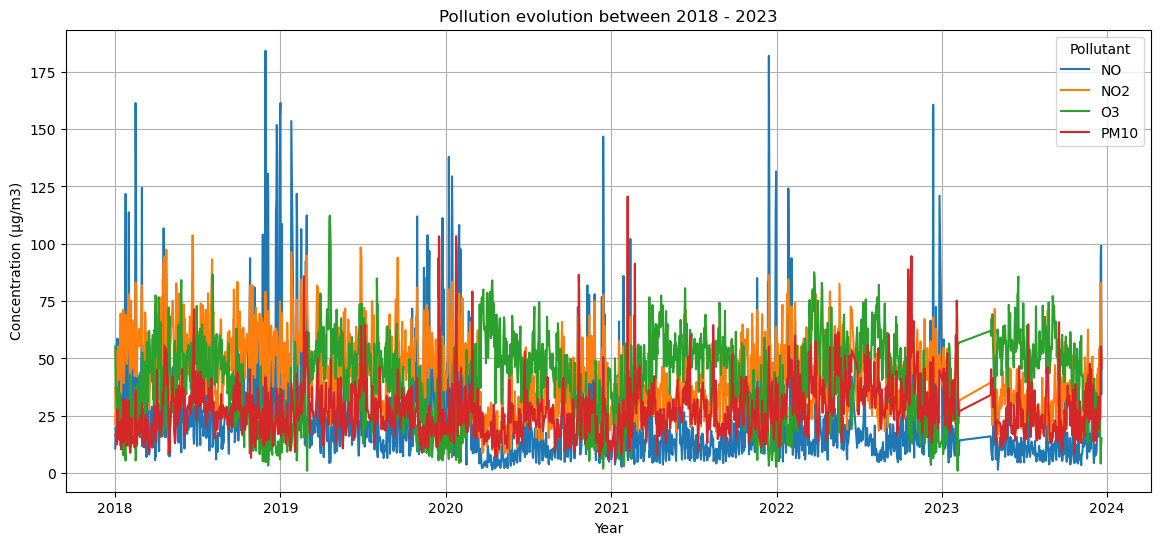

In [71]:
# Gráfico contaminantes
contaminantes = ['NO', 'NO2', 'O3', 'PM10']

plt.figure(figsize=(14, 6))
for contaminante in contaminantes:
    plt.plot(df['data'], df[contaminante], label=contaminante)
    
plt.title('Pollution evolution between 2018 - 2023')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.legend(title='Pollutant')
plt.grid(True)
plt.show()


In this line graph, we can observe the concentration of four different pollutants over the years. These pollutants were chosen because they share the same magnitude and units, facilitating visualization. If we pay attention, we can see the distinct pattern each pollutant follows throughout the year, as they fluctuate significantly based on current conditions (meteorology, traffic, or time of the year). It's important to note that there is a period with no records (at the beginning of 2023), probably due to a technical failure in the air monitoring station. To analyze the graph in-depth, let's look at each pollutant:

- **NO (Nitrogen Oxides)** y **NO₂ (Nitrogen Dioxide)**:
    - *Urban Origin*: Primarily from vehicle emissions and industrial processes.
    - *Annual Behavior*: Higher concentration during heavy traffic and in winter due to heating. In the graph, we can see that it indeed follows the described pattern.
    - *Increase Factors*: Traffic, industrial processes, heating, and stable meteorological conditions limiting dispersion (anticyclone).
   
   <br>
    
- **O₃ (Tropospheric Ozone)**:
    - *Urban Origin*: A secondary pollutant formed by chemical reactions between nitrogen oxides (NOx) and volatile organic compounds (VOCs) in the presence of sunlight.
    - *Annual Behavior*: Higher concentration in summer due to high temperatures and increased solar radiation. In this case, the observed trend also aligns with more ozone concentration in the summer months.
    - *Increase Factors*: Emissions of precursors (NOx and VOCs) and warm, sunny weather.

   <br>

- **PM10 (Particulate Matter with Diameter Less Than 10 Micrometers)**:

    - *Urban Origin*: Comes from various sources, including traffic, biomass combustion, industry, and suspended particles in urban dust.
    - *Annual Behavior*: May have higher concentrations in winter due to heating and stable meteorological conditions. As seen in the graph, concentration peaks are in the winter months. It's worth noting that in recent years, prolonged drought might be a cause of a slight increase in this pollutant, as rain dilutes and reduces its presence in the atmosphere.
    - *Increase Factors*: Traffic, industrial activities, heating, and stable meteorological conditions (anticyclone).


In the following graphs, we will explore the remaining pollutants, as they have different magnitudes and units (making the interpretation of the graph easier).

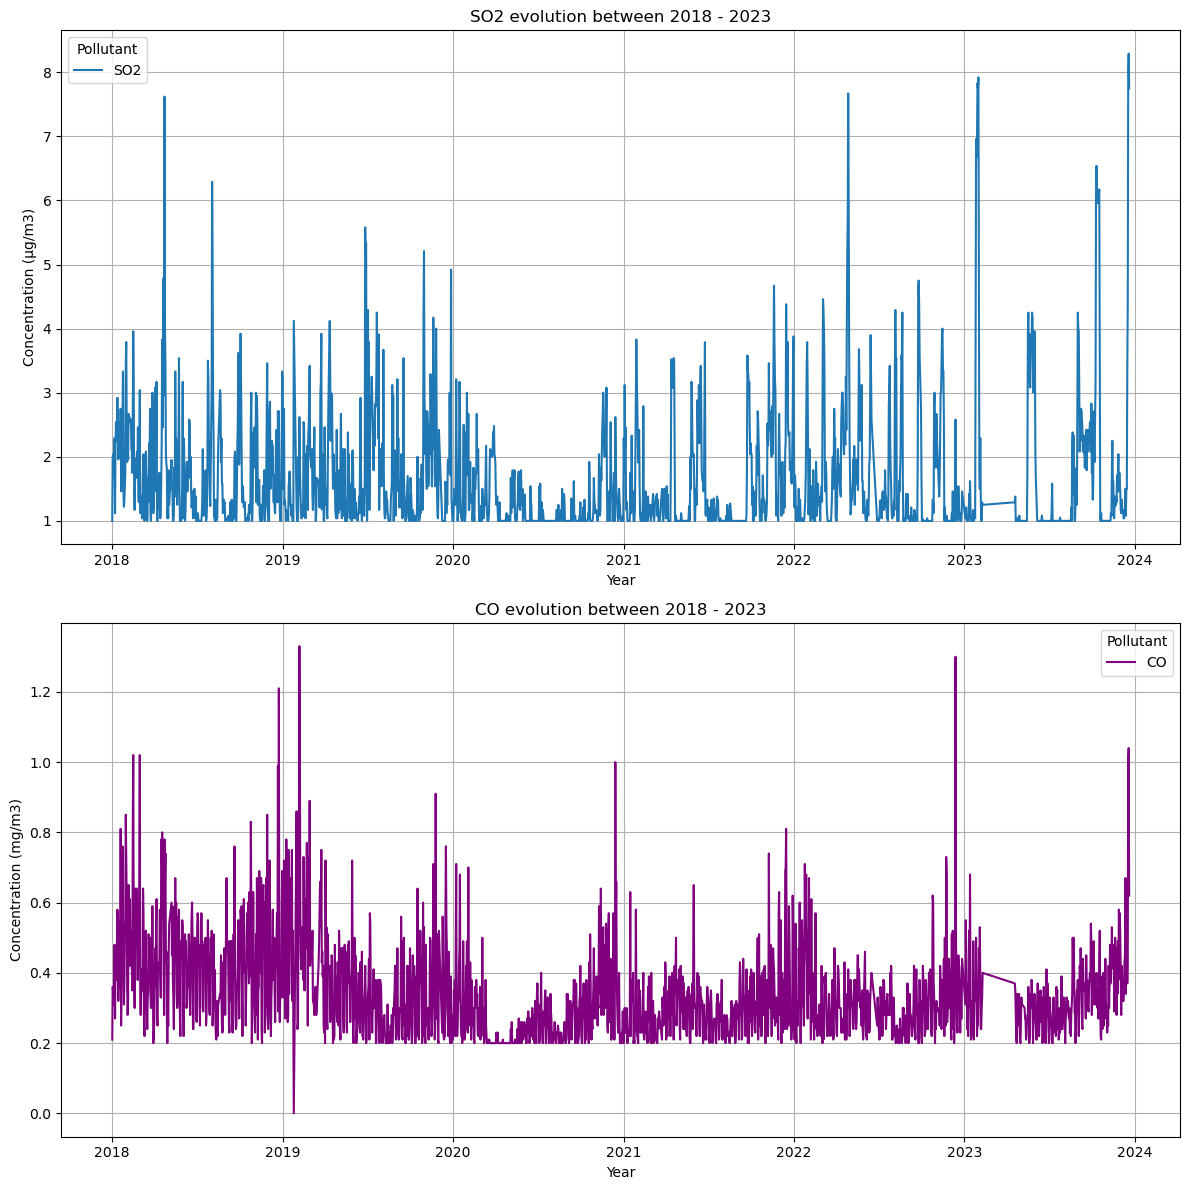

In [72]:
# Gráfico contaminantes

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].plot(df['data'], df['SO2'], label='SO2')
axs[0].set_title('SO2 evolution between 2018 - 2023')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Concentration (µg/m3)')
axs[0].legend(title='Pollutant')
axs[0].grid(True)

axs[1].plot(df['data'], df['CO'], label='CO', color='purple')
axs[1].set_title('CO evolution between 2018 - 2023')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Concentration (mg/m3)')
axs[1].legend(title='Pollutant')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In both graphs, it can be observed that during the pandemic (from 2020 onwards), the concentration of CO and SO₂ decreased due to reduced car presence and industrial activity, resulting in fewer emissions of these pollutants into the atmosphere.

- **SO₂ (Sulfur Dioxide)**:
    - *Urban Origin*: Primarily comes from the combustion of coal and oil in industrial processes and power generation.
    - *Annual Behavior*: May have higher concentrations in winter due to heating. In this case, the pattern is not as clear. This could be due to less comprehensive records, many null values, or the distortion introduced by including the mean.
    - *Increase Factors*:  Combustion of fossil fuels, industrial processes, and stable meteorological conditions (anticyclone).

   <br>
   
- **CO (Monóxido de Carbono)**:
    - *Urban Origin*: Mainly from the combustion of fossil fuels, especially in vehicles and industrial processes.
    - *Annual Behavior*: Higher concentration in winter due to heating. The graph shows how concentration peaks are mainly distributed in winter.
    - *Increase Factors*: Traffic, industrial processes, and stable meteorological conditions (anticyclone).

In the case of CO, an outlier is visible: a record of 0 mg/m³. This data is inconsistent, as it is practically impossible for conditions to result in a zero concentration of CO. Consequently, I consider it a null value and proceed to delete it.

In [73]:
# Mirar el outlier

df[df['CO'] == 0]

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
389,Barcelona (Eixample),26,41.385315,2.1538,2019-01-25,2019,1,25,winter,0.0,153.54,96.33,11.33,39.33,4.12


Realizo el mismo gráfico pero sin ese outlier.

In [74]:
# Eliminar el outlier (como el valor es 0 lo considero nulo, ya que no és lógico que se registrara 0 concentración de CO)

df.drop(df[df['CO'] == 0].index, inplace=True)

C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\3643393529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['CO'] == 0].index, inplace=True)


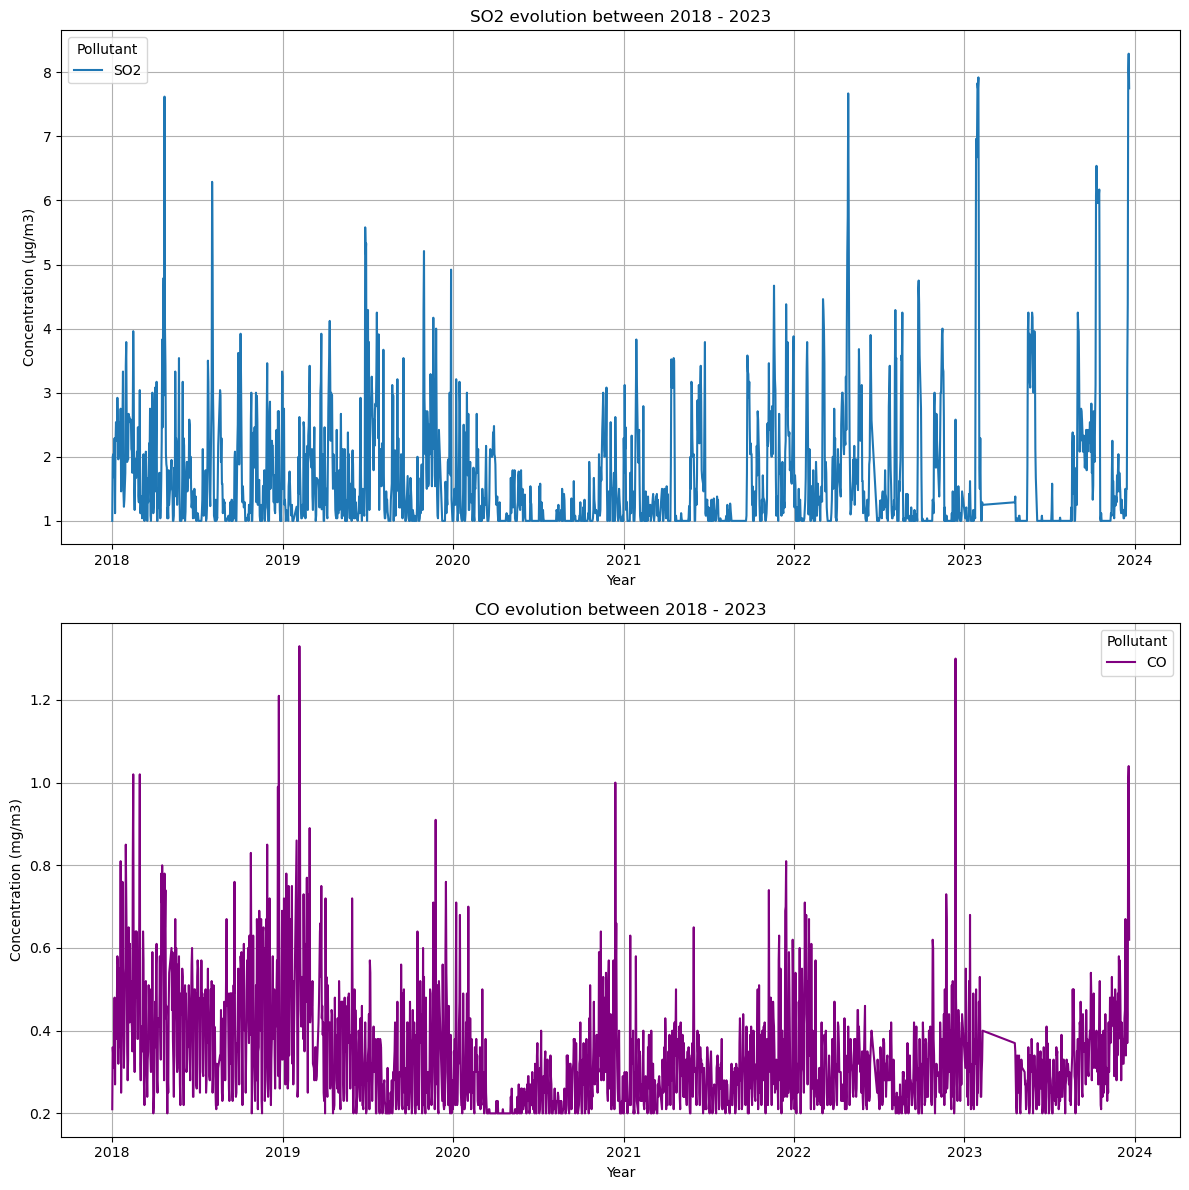

In [75]:
# Gráfico contaminantes

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].plot(df['data'], df['SO2'], label='SO2')
axs[0].set_title('SO2 evolution between 2018 - 2023')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Concentration (µg/m3)')
axs[0].legend(title='Pollutant')
axs[0].grid(True)

axs[1].plot(df['data'], df['CO'], label='CO', color='purple')
axs[1].set_title('CO evolution between 2018 - 2023')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Concentration (mg/m3)')
axs[1].legend(title='Pollutant')
axs[1].grid(True)

plt.tight_layout()
plt.show()

I save the clean dataset to a CSV file for future use.

In [76]:
# Guardar el df con los contaminantes en columnas en un archivo csv

df_archivo = "cont_bcn_eixample_18_23_clean.csv"
df.to_csv(df_archivo, index=False)

We have already observed the main idea, which is the evolution of pollutants over time. Now, I will conduct a visual analysis of different aspects that may be interesting to highlight.

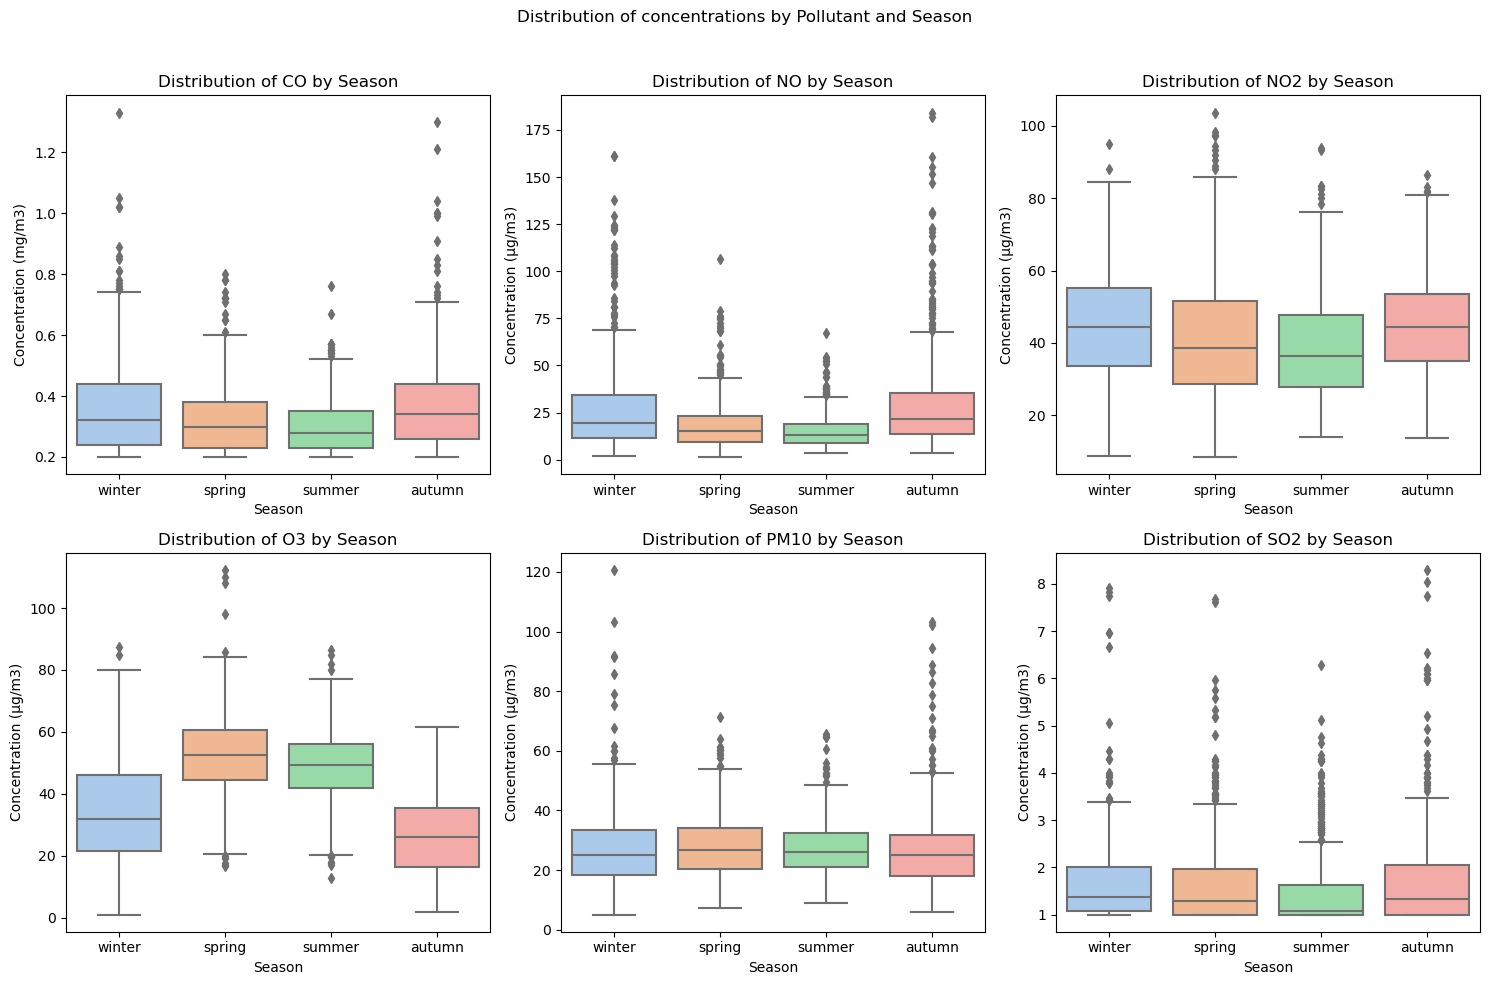

In [77]:
# Boxplot para cada estación

contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of concentrations by Pollutant and Season')

for i, contaminant in enumerate(contaminants):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    sns.boxplot(x='season', y=contaminant, data=df, ax=ax, palette='pastel')
    ax.set_xlabel('Season')
  
    if contaminant == 'CO':
        ax.set_ylabel('Concentration (mg/m3)')
    else:
        ax.set_ylabel('Concentration (µg/m3)')
        
    ax.set_title(f'Distribution of {contaminant} by Season')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In these graphs, we can observe the distribution by season, as the concentration of pollutants can oscillate depending on the season of the year.

C:\Users\Paula\AppData\Local\Temp\ipykernel_30232\813443383.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = df.groupby('month').mean()


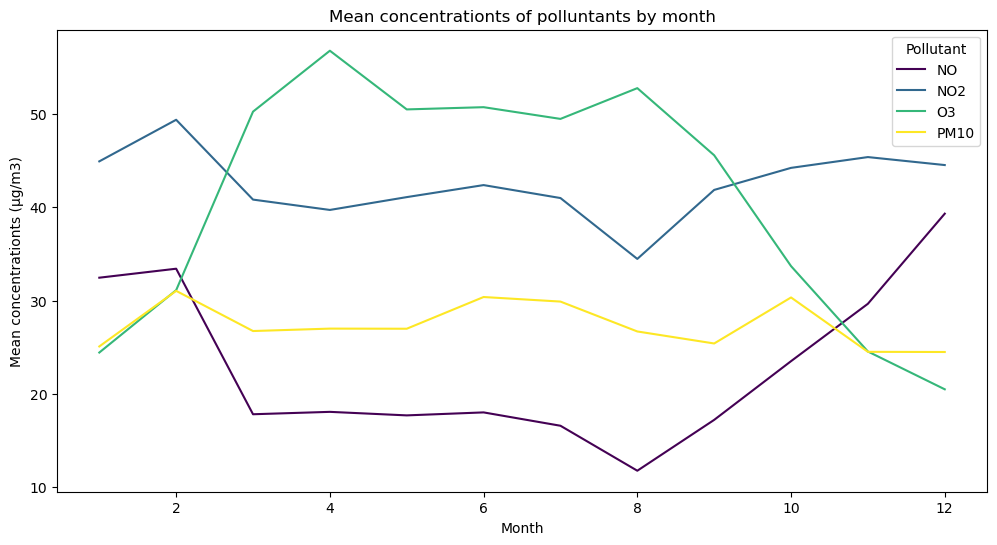

In [82]:
# Gráfico de la contaminación media por mes 

monthly_means = df.groupby('month').mean()
monthly_means = monthly_means[contaminantes]

monthly_means.plot(kind='line', figsize=(12, 6), colormap='viridis')

plt.xlabel('Month')
plt.ylabel('Mean concentrationts (µg/m3)')
plt.title('Mean concentrationts of polluntants by month')
plt.legend(title='Pollutant')

plt.show()

In this graph, we can observe the average concentration per month. O₃ stands out for increasing its presence in summer, while NO sees a concentration rise in winter, similarly to NO₂, which follows almost the same pattern as NO, albeit more subdued. PM10 remains relatively stable throughout the year.

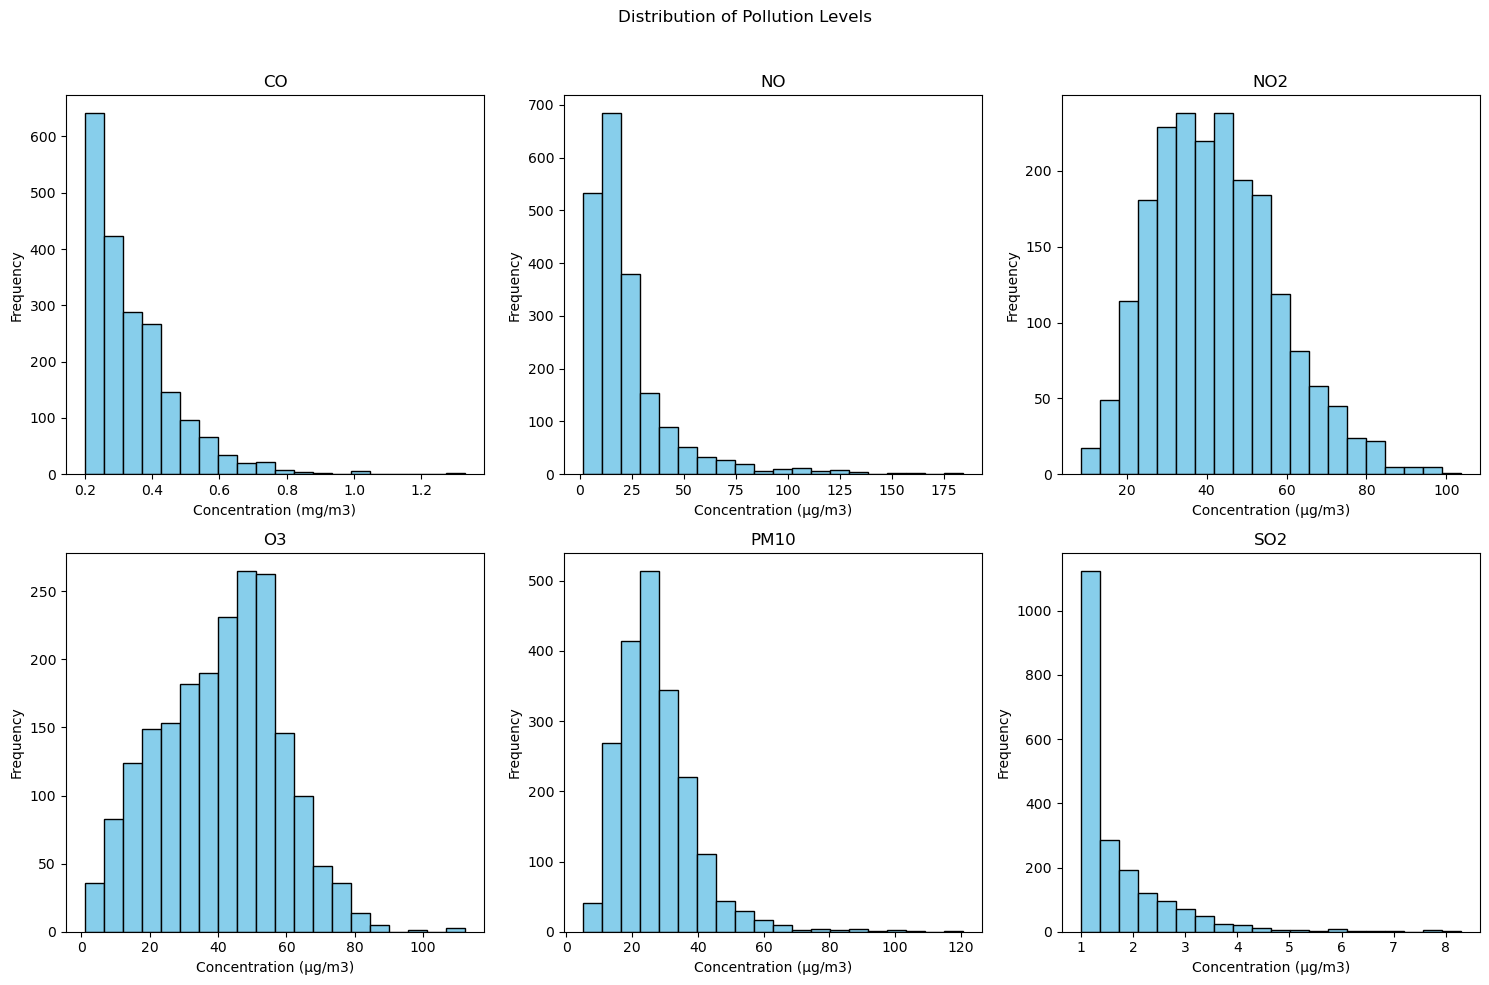

In [79]:
# Gráfico de la distribución de los niveles de contaminación por contaminante

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribution of Pollution Levels")

for i, contaminant in enumerate(contaminants):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.hist(df[contaminant], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(contaminant)
    
    if contaminant == 'CO':
        ax.set_xlabel('Concentration (mg/m3)')
    else:
        ax.set_xlabel('Concentration (µg/m3)')
    
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

With this graph, we can assess whether pollutants follow a normal distribution or not, wihch none of them exhibit one; only NO₂ approaches this type of distribution slightly.

***
After completing the cleaning and in-depth analysis of the dataset, we proceed to the Data Preprocessing section and use of ML algorithms. The upcoming file **(2_Preprocessing_ML)** will focus on these tasks.